# Data Science FIT Competition 2024 "Creating Sustainable Solution For Smart City"

Team Members:
- Kharisma Rizki Wijanarko
- Aditya Yoga Darmawan

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Pre-processing

### Data Train

In [2]:
# Load the data
train_df = pd.read_csv('data/train.csv')
train_df.head()

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score
0,11012022,Simeulue,2022,"1,838.09","94,876",51.62,Low,0.12,67.27,"2,688",1.0,"1,628.09",72.37
1,11032022,Aceh Selatan,2022,"4,173.82","237,376",56.87,Low,NaN,67.87,"6,447",1.0,"3,521.77",72.54
2,11042022,Aceh Tenggara,2022,"4,242.04","228,308",53.82,Low,NaN,70.32,"5,829",1.0,"3,333.30",72.38
3,11062022,Aceh Tengah,2022,"4,527.53","222,673",49.18,Low,1.11,73.95,"8,873",1.0,NaN,71.38
4,11072022,Aceh Barat,2022,"2,927.95","202,858",69.28,Low,0.01,72.34,"12,730",1.0,"3,702.16",72.36


In [3]:
# Overview of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               822 non-null    int64  
 1   city_or_regency                  822 non-null    object 
 2   year                             822 non-null    int64  
 3   total_area (km2)                 822 non-null    object 
 4   population                       822 non-null    object 
 5   densities                        822 non-null    float64
 6   traffic_density                  822 non-null    object 
 7   green_open_space                 434 non-null    object 
 8   hdi                              822 non-null    float64
 9   gross_regional_domestic_product  822 non-null    object 
 10  total_landfills                  420 non-null    float64
 11  solid_waste_generated            428 non-null    object 
 12  happiness_score       

There are 5 columns that have wrong data type (total_area (km2), population, green_open_space, gross_regional_domestic_product, and solid_waste_generated). We need to convert them to the right data type, which is float64.

In [4]:
# Convert data type
train_df['total_area (km2)'] = pd.to_numeric(train_df['total_area (km2)'].str.replace(',', ''), errors='coerce')

In [5]:
train_df['population'] = pd.to_numeric(train_df['population'].str.replace(',', ''), errors='coerce')

In [6]:
train_df['green_open_space'] = pd.to_numeric(train_df['green_open_space'].str.replace(',', ''), errors='coerce')

In [7]:
train_df['gross_regional_domestic_product'] = pd.to_numeric(train_df['gross_regional_domestic_product'].str.replace(',', ''), errors='coerce')

In [8]:
train_df['solid_waste_generated'] = pd.to_numeric(train_df['solid_waste_generated'].str.replace(',', ''), errors='coerce')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               822 non-null    int64  
 1   city_or_regency                  822 non-null    object 
 2   year                             822 non-null    int64  
 3   total_area (km2)                 822 non-null    float64
 4   population                       822 non-null    int64  
 5   densities                        822 non-null    float64
 6   traffic_density                  822 non-null    object 
 7   green_open_space                 434 non-null    float64
 8   hdi                              822 non-null    float64
 9   gross_regional_domestic_product  822 non-null    int64  
 10  total_landfills                  420 non-null    float64
 11  solid_waste_generated            427 non-null    float64
 12  happiness_score       

In [10]:
# Check for unique values
train_df.nunique()

id                                 822
city_or_regency                    498
year                                 2
total_area (km2)                   548
population                         821
densities                          819
traffic_density                      3
green_open_space                   251
hdi                                666
gross_regional_domestic_product    819
total_landfills                      7
solid_waste_generated              419
happiness_score                    577
dtype: int64

Since traffic_density is an ordinal categorical data, we need to convert it to numerical data by using label encoding. while for year, it is a nominal categorical data, we need to use one-hot encoding.

In [11]:
train_df['traffic_density'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [12]:
# Convert traffic_density to numerical data
train_df['traffic_density'] = train_df['traffic_density'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [13]:
# Check for unique values
train_df['traffic_density'].unique()

array([1, 2, 3], dtype=int64)

In [14]:
# One-hot encoding
train_df = pd.get_dummies(train_df, columns=['year'])

In [15]:
# Overview of the data
train_df.head()

,id,city_or_regency,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score,year_2022,year_2023
0,11012022,Simeulue,1838.09,94876,51.62,1,0.12,67.27,2688,1.0,1628.09,72.37,1,0
1,11032022,Aceh Selatan,4173.82,237376,56.87,1,NaN,67.87,6447,1.0,3521.77,72.54,1,0
2,11042022,Aceh Tenggara,4242.04,228308,53.82,1,NaN,70.32,5829,1.0,3333.30,72.38,1,0
3,11062022,Aceh Tengah,4527.53,222673,49.18,1,1.11,73.95,8873,1.0,NaN,71.38,1,0
4,11072022,Aceh Barat,2927.95,202858,69.28,1,0.01,72.34,12730,1.0,3702.16,72.36,1,0


In [16]:
# Check for missing values
train_df.isna().sum()

id                                   0
city_or_regency                      0
total_area (km2)                     0
population                           0
densities                            0
traffic_density                      0
green_open_space                   388
hdi                                  0
gross_regional_domestic_product      0
total_landfills                    402
solid_waste_generated              395
happiness_score                      0
year_2022                            0
year_2023                            0
dtype: int64

There are 3 columns that have missing values. Which are green_open_space (388 missing data), total_landfills (402 missing data), and solid_waste_generated(394 missing data).

In [17]:
# Check for duplicated data
train_df.duplicated().sum()

0

In [18]:
# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [19]:
train_df[['green_open_space', 'total_landfills', 'solid_waste_generated']] = imputer.fit_transform(train_df[['green_open_space', 'total_landfills', 'solid_waste_generated']])

In [20]:
# # Missing data imputation
# train_df['green_open_space'].fillna(train_df['green_open_space'].mean(), inplace=True)
# train_df['total_landfills'].fillna(train_df['total_landfills'].mean(), inplace=True)
# train_df['solid_waste_generated'].fillna(train_df['solid_waste_generated'].mean(), inplace=True)

In [21]:
# Check for missing values
train_df.isna().sum()

id                                 0
city_or_regency                    0
total_area (km2)                   0
population                         0
densities                          0
traffic_density                    0
green_open_space                   0
hdi                                0
gross_regional_domestic_product    0
total_landfills                    0
solid_waste_generated              0
happiness_score                    0
year_2022                          0
year_2023                          0
dtype: int64

In [22]:
train_df.head()

,id,city_or_regency,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score,year_2022,year_2023
0,11012022,Simeulue,1838.09,94876,51.62,1,0.120,67.27,2688,1.0,1628.09,72.37,1,0
1,11032022,Aceh Selatan,4173.82,237376,56.87,1,1289.614,67.87,6447,1.0,3521.77,72.54,1,0
2,11042022,Aceh Tenggara,4242.04,228308,53.82,1,660.226,70.32,5829,1.0,3333.30,72.38,1,0
3,11062022,Aceh Tengah,4527.53,222673,49.18,1,1.110,73.95,8873,1.0,12984.51,71.38,1,0
4,11072022,Aceh Barat,2927.95,202858,69.28,1,0.010,72.34,12730,1.0,3702.16,72.36,1,0


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               822 non-null    int64  
 1   city_or_regency                  822 non-null    object 
 2   total_area (km2)                 822 non-null    float64
 3   population                       822 non-null    int64  
 4   densities                        822 non-null    float64
 5   traffic_density                  822 non-null    int64  
 6   green_open_space                 822 non-null    float64
 7   hdi                              822 non-null    float64
 8   gross_regional_domestic_product  822 non-null    int64  
 9   total_landfills                  822 non-null    float64
 10  solid_waste_generated            822 non-null    float64
 11  happiness_score                  822 non-null    float64
 12  year_2022             

In [24]:
# Drop unnecessary columns
train_df.drop(['city_or_regency'], axis=1, inplace=True)

In [25]:
train_df.describe()

,id,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score,year_2022,year_2023
count,8.220000e+02,8.220000e+02,8.220000e+02,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,4.530244e+07,8.590443e+04,5.466184e+05,1159.968893,1.152068,210.571206,71.079745,39621.873479,1.254319,11937.427522,73.919246,0.500000,0.500000
std,2.649860e+07,2.350003e+06,6.364292e+05,2689.298031,0.421689,544.779138,6.449038,85172.893107,0.629836,10689.877684,2.705407,0.500304,0.500304
min,1.101202e+07,1.073000e+01,2.501500e+04,0.000000,1.000000,0.000000,34.100000,256.000000,1.000000,481.800000,65.110000,0.000000,0.000000
25%,1.806202e+07,7.895000e+02,1.658200e+05,55.095000,1.000000,0.687500,67.922500,6845.500000,1.000000,5409.625500,71.990000,0.000000,0.000000
50%,3.529202e+07,1.891475e+03,3.033345e+05,169.990000,1.000000,119.240000,70.845000,16117.500000,1.000000,11758.668946,73.695000,0.500000,0.500000
75%,7.172952e+07,4.330290e+03,6.668105e+05,911.842500,1.000000,132.687350,74.350000,35744.000000,1.264286,11957.018000,75.622500,1.000000,1.000000
max,9.471202e+07,6.737960e+07,5.566838e+06,22150.590000,3.000000,6881.990000,88.280000,860049.000000,8.000000,85161.360000,81.810000,1.000000,1.000000


Most of the columns ('total_area (km2)', 'population', 'green_open_space', 'total_landfills', 'gross_regional_domestic_product', 'densities', 'hdi', 'solid_waste_generated') have very high standard deviation, which means that the data is spread out over a wide range of values. We need to normalize the data to make the data more consistent.

In [26]:
# Normalize the data
scaler = RobustScaler()
train_df[['total_area (km2)', 'population', 'green_open_space', 'total_landfills', 'gross_regional_domestic_product', 'densities', 'hdi', 'solid_waste_generated']] = scaler.fit_transform(train_df[['total_area (km2)', 'population', 'green_open_space', 'total_landfills', 'gross_regional_domestic_product', 'densities', 'hdi', 'solid_waste_generated']])

In [27]:
# Overview of the data
train_df.head()

,id,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score,year_2022,year_2023
0,11012022,-0.015077,-0.416093,-0.138162,1,-0.902425,-0.556204,-0.464713,0.0,-1.547269,72.37,1,0
1,11032022,0.644586,-0.131656,-0.132034,1,8.866480,-0.462855,-0.334637,0.0,-1.258043,72.54,1,0
2,11042022,0.663853,-0.149756,-0.135594,1,4.098383,-0.081680,-0.356022,0.0,-1.286828,72.38,1,0
3,11062022,0.744482,-0.161004,-0.141010,1,-0.894925,0.483081,-0.250688,0.0,0.187226,71.38,1,0
4,11072022,0.292724,-0.200556,-0.117549,1,-0.903259,0.232594,-0.117221,0.0,-1.230491,72.36,1,0


In [28]:
train_df.describe()

,id,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score,year_2022,year_2023
count,8.220000e+02,8.220000e+02,822.000000,8.220000e+02,822.000000,8.220000e+02,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,4.530244e+07,2.372718e+01,0.485606,1.155508e+00,1.152068,6.919039e-01,0.036522,0.813342,0.962287,0.027302,73.919246,0.500000,0.500000
std,2.649860e+07,6.636946e+02,1.270342,3.138962e+00,0.421689,4.127119e+00,1.003351,2.947312,2.383162,1.632692,2.705407,0.500304,0.500304
min,1.101202e+07,-5.311654e-01,-0.555538,-1.984132e-01,1.000000,-9.033344e-01,-5.716842,-0.548869,0.000000,-1.722345,65.110000,0.000000,0.000000
25%,1.806202e+07,-3.112229e-01,-0.274485,-1.341060e-01,1.000000,-8.981260e-01,-0.454687,-0.320847,0.000000,-0.969706,71.990000,0.000000,0.000000
50%,3.529202e+07,3.209238e-17,0.000000,-1.658829e-17,1.000000,-5.377643e-17,0.000000,0.000000,0.000000,0.000000,73.695000,0.500000,0.500000
75%,7.172952e+07,6.887771e-01,0.725515,8.658940e-01,1.000000,1.018740e-01,0.545313,0.679153,1.000000,0.030294,75.622500,1.000000,1.000000
max,9.471202e+07,1.902900e+04,10.506194,2.565587e+01,3.000000,5.123301e+01,2.712563,29.203298,26.486486,11.210981,81.810000,1.000000,1.000000


In [33]:
numerical_columns = ['total_area (km2)', 'population', 'green_open_space', 'total_landfills', 'gross_regional_domestic_product', 'densities', 'hdi', 'solid_waste_generated']

In [34]:
# Outliers Detection and Removal using Z-Score
from scipy import stats
z = np.abs(stats.zscore(train_df[numerical_columns]))

# Remove outliers
train_df = train_df[(z < 3).all(axis=1)]

In [35]:
train_df.describe()

,id,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score,year_2022,year_2023
count,6.260000e+02,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,4.438642e+07,0.348204,0.209426,0.381619,1.054313,0.022589,0.009829,0.144661,0.615836,-0.272121,73.964457,0.490415,0.509585
std,2.647118e+07,1.003574,0.724720,0.946898,0.226816,1.416781,0.744923,0.706709,0.915449,0.880659,2.635800,0.500308,0.500308
min,1.101202e+07,-0.531165,-0.555538,-0.196336,1.000000,-0.903334,-2.379619,-0.548281,0.000000,-1.722345,65.110000,0.000000,0.000000
25%,1.673452e+07,-0.283147,-0.290391,-0.130847,1.000000,-0.900380,-0.450019,-0.332699,0.000000,-1.048298,72.120000,0.000000,0.000000
50%,3.529202e+07,0.001070,-0.069295,-0.023023,1.000000,-0.329508,-0.041229,-0.090576,0.000000,0.000000,73.725000,0.000000,1.000000
75%,7.194452e+07,0.579244,0.347432,0.485432,1.000000,0.101874,0.395955,0.349802,1.000000,0.000000,75.747500,1.000000,1.000000
max,9.471202e+07,5.222296,2.877259,5.490229,2.000000,6.948644,2.401400,3.924581,3.783784,2.939111,81.810000,1.000000,1.000000


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 821
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               626 non-null    int64  
 1   total_area (km2)                 626 non-null    float64
 2   population                       626 non-null    float64
 3   densities                        626 non-null    float64
 4   traffic_density                  626 non-null    int64  
 5   green_open_space                 626 non-null    float64
 6   hdi                              626 non-null    float64
 7   gross_regional_domestic_product  626 non-null    float64
 8   total_landfills                  626 non-null    float64
 9   solid_waste_generated            626 non-null    float64
 10  happiness_score                  626 non-null    float64
 11  year_2022                        626 non-null    uint8  
 12  year_2023             

Polynomial Features

In [37]:
# from sklearn.preprocessing import PolynomialFeatures
# 
# # Apply Polynomial Features on important features
# important_features = ['green_open_space', 'total_landfills', 'solid_waste_generated', 'gross_regional_domestic_product', 'densities', 'hdi']
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# 
# # Create Polynomial Features
# poly_features = poly.fit_transform(train_df[important_features])
# 
# # Create a DataFrame
# poly_feature_names = poly.get_feature_names_out(input_features=important_features)
# new_columns = [column.replace(' ', '_') for column in poly_feature_names]
# train_poly_df = pd.DataFrame(poly_features, columns=new_columns)
# 
# # Merge the data with the original data and join them on the same index
# train_df = pd.concat([train_df, train_poly_df[new_columns]], axis=1)

In [38]:
train_df.isna().sum()

id                                 0
total_area (km2)                   0
population                         0
densities                          0
traffic_density                    0
green_open_space                   0
hdi                                0
gross_regional_domestic_product    0
total_landfills                    0
solid_waste_generated              0
happiness_score                    0
year_2022                          0
year_2023                          0
dtype: int64

Ratios and Products

In [39]:
# Create Ratios features using important features
train_df['hdi_gdp_ratio'] = train_df['hdi'] / train_df['gross_regional_domestic_product']
train_df['population_density'] = train_df['population'] / train_df['densities']
train_df['area_population_ratio'] = train_df['total_area (km2)'] / train_df['population']

# Create Products features using important features
train_df['hdi_gdp_product'] = train_df['hdi'] * train_df['gross_regional_domestic_product']
train_df['population_density_product'] = train_df['population'] * train_df['densities']
train_df['area_population_product'] = train_df['total_area (km2)'] * train_df['population']

In [41]:
train_df.isna().sum()

id                                 0
total_area (km2)                   0
population                         0
densities                          0
traffic_density                    0
green_open_space                   0
hdi                                0
gross_regional_domestic_product    0
total_landfills                    0
solid_waste_generated              0
happiness_score                    0
year_2022                          0
year_2023                          0
hdi_gdp_ratio                      0
population_density                 0
area_population_ratio              0
hdi_gdp_product                    0
population_density_product         0
area_population_product            0
dtype: int64

Logarithmic Transformation

In [42]:
# Apply Logarithmic Transformation
negative_or_zero_hdi = train_df['hdi'] <= 0
train_df.loc[negative_or_zero_hdi, 'hdi'] = 0.0001
train_df['log_hdi'] = np.log1p(train_df['hdi'])
train_df['log_gdp'] = np.log1p(train_df['gross_regional_domestic_product'])
train_df['log_population'] = np.log1p(train_df['population'])
train_df['log_densities'] = np.log1p(train_df['densities'])
train_df['log_total_area'] = np.log1p(train_df['total_area (km2)'])

In [44]:
train_df.isna().sum()

id                                 0
total_area (km2)                   0
population                         0
densities                          0
traffic_density                    0
green_open_space                   0
hdi                                0
gross_regional_domestic_product    0
total_landfills                    0
solid_waste_generated              0
happiness_score                    0
year_2022                          0
year_2023                          0
hdi_gdp_ratio                      0
population_density                 0
area_population_ratio              0
hdi_gdp_product                    0
population_density_product         0
area_population_product            0
log_hdi                            0
log_gdp                            0
log_population                     0
log_densities                      0
log_total_area                     0
dtype: int64

In [45]:
# Drop original columns
train_df.drop(['hdi', 'gross_regional_domestic_product', 'population', 'densities', 'total_area (km2)'], axis=1, inplace=True)

In [46]:
train_df.describe()

,id,traffic_density,green_open_space,total_landfills,solid_waste_generated,happiness_score,year_2022,year_2023,hdi_gdp_ratio,population_density,area_population_ratio,hdi_gdp_product,population_density_product,area_population_product,log_hdi,log_gdp,log_population,log_densities,log_total_area
count,6.260000e+02,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,4.438642e+07,1.054313,0.022589,0.615836,-0.272121,73.964457,0.490415,0.509585,2.487197,48.834236,10.553703,0.176142,0.247401,-0.018552,0.198367,-0.000842,0.047709,0.186512,0.108629
std,2.647118e+07,0.226816,1.416781,0.915449,0.880659,2.635800,0.500308,0.500308,51.244930,1055.067411,214.551225,0.549044,0.759667,0.573001,0.301652,0.491300,0.509554,0.464883,0.579089
min,1.101202e+07,1.000000,-0.903334,0.000000,-1.722345,65.110000,0.000000,0.000000,-355.252979,-130.588184,-714.685555,-1.254335,-1.976098,-2.375225,0.000100,-0.794695,-0.810892,-0.218573,-0.757505
25%,1.673452e+07,1.000000,-0.900380,0.000000,-1.048298,72.120000,0.000000,0.000000,-0.619670,-0.163866,-1.310193,-0.033228,-0.004364,-0.157580,0.000100,-0.404515,-0.343042,-0.140236,-0.332885
50%,3.529202e+07,1.000000,-0.329508,0.000000,0.000000,73.725000,0.000000,1.000000,0.424324,1.136357,-0.052549,0.031737,0.022149,-0.003183,0.000100,-0.094944,-0.071813,-0.023292,0.001070
75%,7.194452e+07,1.000000,0.101874,1.000000,0.000000,75.747500,1.000000,1.000000,1.905266,2.450851,1.218261,0.254186,0.082199,0.079333,0.333579,0.299958,0.298198,0.395689,0.456946
max,9.471202e+07,2.000000,6.948644,3.783784,2.939111,81.810000,1.000000,1.000000,925.244202,26109.114162,4077.265990,4.520404,5.177477,4.771867,1.224187,1.594239,1.355128,1.870298,1.828139


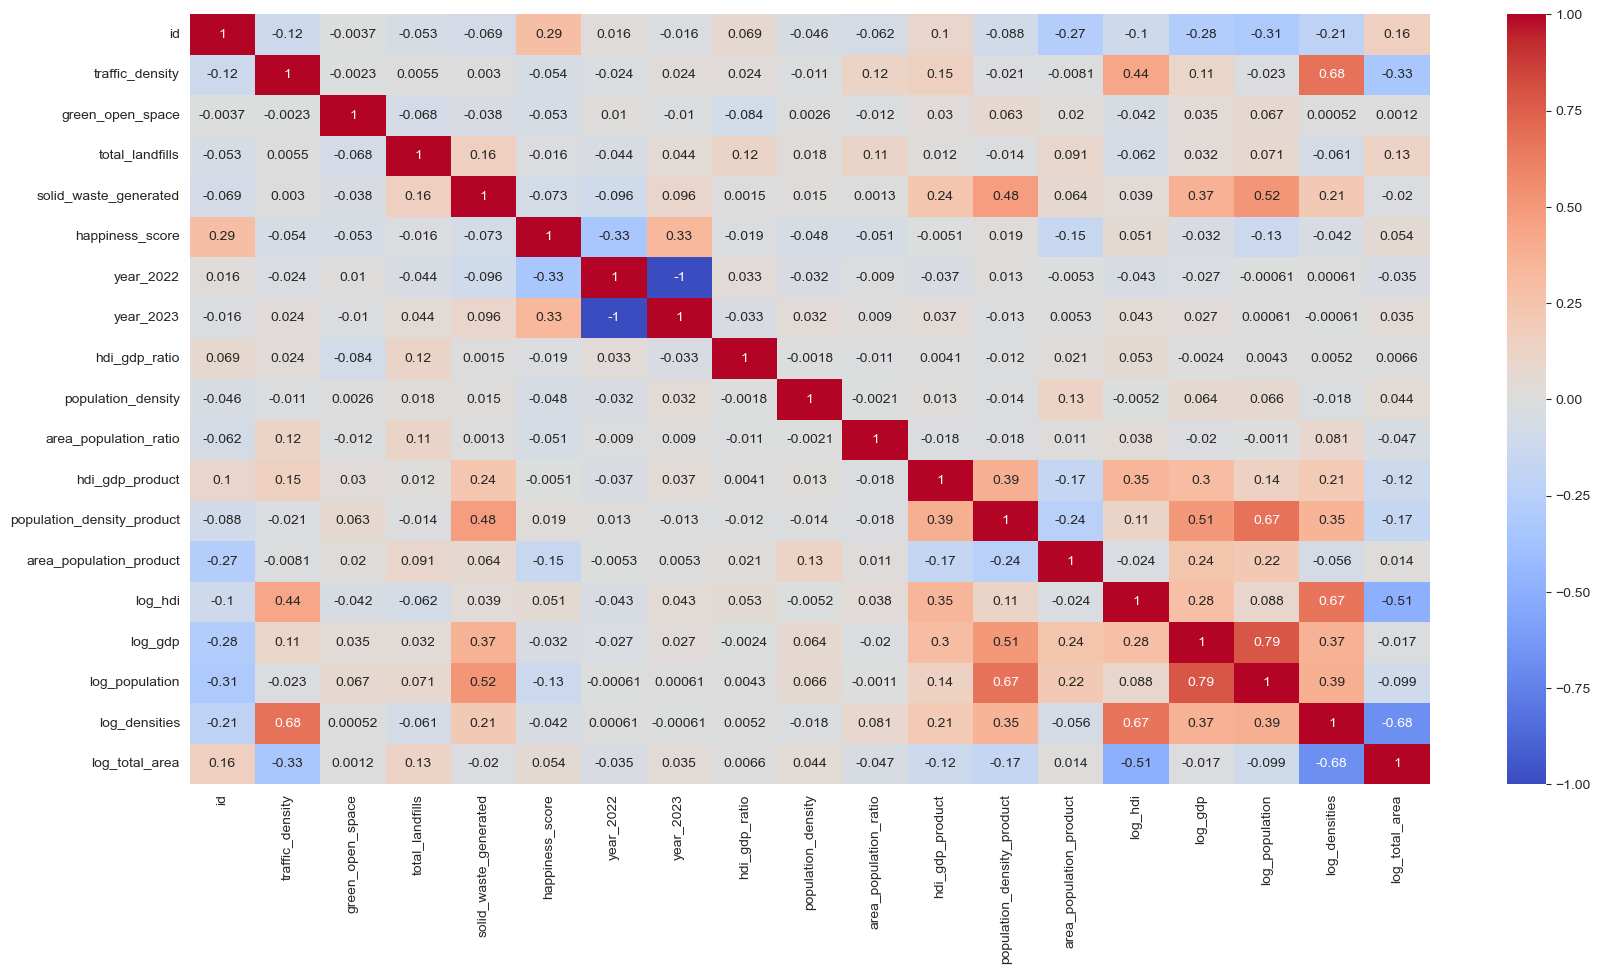

In [47]:
# Check for correlation and visualize it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Data Test

In [67]:
# Load the data
test_df = pd.read_csv('data/test.csv')
test_df.head()

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated
0,11022022,Aceh Singkil,2022,"1,857.88","130,787",70.40,Low,685.53,69.62,"3,005",1.0,"1,926.13"
1,11052022,Aceh Timur,2022,"6,040.60","432,849",71.66,Low,0.09,68.72,"13,101",2.0,"6,319.60"
2,11092022,Pidie,2022,"3,184.46","444,505",139.59,Low,0.42,71.20,"12,412",1.0,"6,489.77"
3,11182022,Pidie Jaya,2022,952.11,"162,771",170.96,Low,0.05,74.34,"3,980",1.0,"2,902.94"
4,11752022,City of Subulussalam,2022,"1,391.00","95,199",68.44,Low,0.20,66.20,"2,365",1.0,"1,353.00"


In [68]:
# Overview of the data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               206 non-null    int64  
 1   city_or_regency                  206 non-null    object 
 2   year                             206 non-null    int64  
 3   total_area (km2)                 206 non-null    object 
 4   population                       206 non-null    object 
 5   densities                        206 non-null    float64
 6   traffic_density                  206 non-null    object 
 7   green_open_space                 105 non-null    float64
 8   hdi                              206 non-null    float64
 9   gross_regional_domestic_product  206 non-null    object 
 10  total_landfills                  104 non-null    float64
 11  solid_waste_generated            104 non-null    object 
dtypes: float64(4), int64(2

On test set, the green_open_space already has the right data type. We only need to convert total_area (km2), population, gross_regional_domestic_product, and solid_waste_generated to the right data type.

In [69]:
# Convert data type
test_df['total_area (km2)'] = pd.to_numeric(test_df['total_area (km2)'].str.replace(',', ''), errors='coerce')

In [70]:
test_df['population'] = pd.to_numeric(test_df['population'].str.replace(',', ''), errors='coerce')

In [71]:
test_df['solid_waste_generated'] = pd.to_numeric(test_df['solid_waste_generated'].str.replace(',', ''), errors='coerce')

In [72]:
test_df['gross_regional_domestic_product'] = pd.to_numeric(test_df['gross_regional_domestic_product'].str.replace(',', ''), errors='coerce')

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               206 non-null    int64  
 1   city_or_regency                  206 non-null    object 
 2   year                             206 non-null    int64  
 3   total_area (km2)                 206 non-null    float64
 4   population                       206 non-null    int64  
 5   densities                        206 non-null    float64
 6   traffic_density                  206 non-null    object 
 7   green_open_space                 105 non-null    float64
 8   hdi                              206 non-null    float64
 9   gross_regional_domestic_product  206 non-null    int64  
 10  total_landfills                  104 non-null    float64
 11  solid_waste_generated            103 non-null    float64
dtypes: float64(6), int64(4

In [74]:
# Convert traffic_density to numerical data
test_df['traffic_density'] = test_df['traffic_density'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [75]:
test_df['traffic_density'].unique()

array([1, 2, 3], dtype=int64)

In [76]:
# One-hot encoding
test_df = pd.get_dummies(test_df, columns=['year'])

In [77]:
# Check for missing values
test_df.isna().sum()

id                                   0
city_or_regency                      0
total_area (km2)                     0
population                           0
densities                            0
traffic_density                      0
green_open_space                   101
hdi                                  0
gross_regional_domestic_product      0
total_landfills                    102
solid_waste_generated              103
year_2022                            0
year_2023                            0
dtype: int64

In [78]:
# Impute missing values using KNNImputer on test set
test_df[['green_open_space', 'total_landfills', 'solid_waste_generated']] = imputer.transform(test_df[['green_open_space', 'total_landfills', 'solid_waste_generated']])

In [79]:
# # Missing data imputation
# test_df['green_open_space'].fillna(test_df['green_open_space'].mean(), inplace=True)
# test_df['total_landfills'].fillna(test_df['total_landfills'].mean(), inplace=True)
# test_df['solid_waste_generated'].fillna(test_df['solid_waste_generated'].mean(), inplace=True)

In [80]:
test_df.isna().sum()

id                                 0
city_or_regency                    0
total_area (km2)                   0
population                         0
densities                          0
traffic_density                    0
green_open_space                   0
hdi                                0
gross_regional_domestic_product    0
total_landfills                    0
solid_waste_generated              0
year_2022                          0
year_2023                          0
dtype: int64

In [81]:
# Drop unnecessary columns
test_df.drop(['city_or_regency'], axis=1, inplace=True)

In [82]:
test_df.describe()

,id,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,year_2022,year_2023
count,2.060000e+02,206.000000,2.060000e+02,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,4.750892e+07,4004.949568,5.088239e+05,951.246374,1.111650,184.595798,70.329515,35021.878641,1.240257,11708.527165,0.500000,0.500000
std,2.794847e+07,6293.765919,6.594461e+05,2523.463139,0.372415,293.212438,6.126309,80268.637342,0.500769,10591.567323,0.501218,0.501218
min,1.101202e+07,18.120000,2.537700e+04,2.198125,1.000000,0.000000,44.590000,280.000000,1.000000,961.950000,0.000000,0.000000
25%,1.707452e+07,962.725000,1.497000e+05,48.654709,1.000000,0.439850,67.765000,4972.500000,1.000000,5559.632250,0.000000,0.000000
50%,3.602702e+07,1891.135000,2.672105e+05,126.755259,1.000000,132.687350,69.735000,13666.500000,1.000000,11758.668946,0.500000,0.500000
75%,7.210702e+07,4657.990000,5.884958e+05,735.491663,1.000000,132.687350,73.297500,28397.000000,1.264286,11758.668946,1.000000,1.000000
max,9.436202e+07,46791.630000,5.643838e+06,19760.432000,3.000000,1289.776000,86.690000,655616.000000,5.000000,84425.243000,1.000000,1.000000


In [84]:
# Normalize the data
test_df[['total_area (km2)', 'population', 'green_open_space', 'total_landfills', 'gross_regional_domestic_product', 'densities', 'hdi', 'solid_waste_generated']] = scaler.transform(test_df[['total_area (km2)', 'population', 'green_open_space', 'total_landfills', 'gross_regional_domestic_product', 'densities', 'hdi', 'solid_waste_generated']])

In [85]:
# Overview of the data
test_df.head()

,id,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,year_2022,year_2023
0,11022022,-0.534198,-0.605470,-0.198549,1,-0.870834,-11.051822,-0.557744,-3.783784,-1.796161,1,0
1,11052022,-0.533865,-0.605469,-0.198547,1,-0.910173,-11.073607,-0.557732,10.533236,-1.796058,1,0
2,11092022,-0.534093,-0.605469,-0.198455,1,-0.910154,-11.013577,-0.557732,-3.783784,-1.796054,1,0
3,11182022,-0.534271,-0.605470,-0.198412,1,-0.910175,-10.937572,-0.557742,-3.783784,-1.796138,1,0
4,11752022,-0.534236,-0.605470,-0.198552,1,-0.910166,-11.134605,-0.557744,-3.783784,-1.796174,1,0


In [86]:
# View Data Summary
test_df.describe()

,id,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,year_2022,year_2023
count,2.060000e+02,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,4.750892e+07,-0.534027,-0.605469,-0.197349,1.111650,-0.899583,-11.034648,-0.557705,-0.344025,-1.795933,0.500000,0.500000
std,2.794847e+07,0.000502,0.000003,0.003438,0.372415,0.016828,0.148291,0.000096,7.169525,0.000247,0.501218,0.501218
min,1.101202e+07,-0.534345,-0.605471,-0.198642,1.000000,-0.910178,-11.657688,-0.557747,-3.783784,-1.796183,0.000000,0.000000
25%,1.707452e+07,-0.534270,-0.605470,-0.198578,1.000000,-0.910153,-11.096724,-0.557741,-3.783784,-1.796076,0.000000,0.000000
50%,3.602702e+07,-0.534196,-0.605470,-0.198472,1.000000,-0.902563,-11.049039,-0.557731,-3.783784,-1.795932,0.500000,0.500000
75%,7.210702e+07,-0.533975,-0.605468,-0.197643,1.000000,-0.902563,-10.962806,-0.557713,0.000000,-1.795932,1.000000,1.000000
max,9.436202e+07,-0.530614,-0.605448,-0.171724,3.000000,-0.836155,-10.638633,-0.556962,53.484295,-1.794236,1.000000,1.000000


In [89]:
# Feature Engineering  
# Create Ratios features using important features
test_df['hdi_gdp_ratio'] = test_df['hdi'] / test_df['gross_regional_domestic_product']
test_df['population_density'] = test_df['population'] / test_df['densities']
test_df['area_population_ratio'] = test_df['total_area (km2)'] / test_df['population']

# Create Products features using important features
test_df['hdi_gdp_product'] = test_df['hdi'] * test_df['gross_regional_domestic_product']
test_df['population_density_product'] = test_df['population'] * test_df['densities']
test_df['area_population_product'] = test_df['total_area (km2)'] * test_df['population']

In [90]:
# Apply Logarithmic Transformation
negative_or_zero_hdi = test_df['hdi'] <= 0
test_df.loc[negative_or_zero_hdi, 'hdi'] = 0.0001
test_df['log_hdi'] = np.log1p(test_df['hdi'])
test_df['log_gdp'] = np.log1p(test_df['gross_regional_domestic_product'])
test_df['log_population'] = np.log1p(test_df['population'])
test_df['log_densities'] = np.log1p(test_df['densities'])
test_df['log_total_area'] = np.log1p(test_df['total_area (km2)'])

In [91]:
test_df.isna().sum()

id                                 0
total_area (km2)                   0
population                         0
densities                          0
traffic_density                    0
green_open_space                   0
hdi                                0
gross_regional_domestic_product    0
total_landfills                    0
solid_waste_generated              0
year_2022                          0
year_2023                          0
hdi_gdp_ratio                      0
population_density                 0
area_population_ratio              0
hdi_gdp_product                    0
population_density_product         0
area_population_product            0
log_hdi                            0
log_gdp                            0
log_population                     0
log_densities                      0
log_total_area                     0
dtype: int64

In [655]:
test_df.head()

,id,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,...,population_density,area_population_ratio,hdi_gdp_product,population_density_product,area_population_product,log_hdi,log_gdp,log_population,log_densities,log_total_area
0,11022022,-0.009488,-0.344413,-0.116242,1,4.290081,-0.190587,-0.453743,0.000000,-1.501749,...,2.962895,0.027548,0.086478,0.040035,0.003268,-0.211446,-0.604666,-0.422224,-0.123572,-0.009533
1,11052022,1.171808,0.258517,-0.114771,1,-0.902653,-0.330611,-0.104383,3.783784,-0.830723,...,-2.252453,4.532809,0.034510,-0.029670,0.302932,-0.401389,-0.110242,0.229934,-0.121909,0.775560
2,11092022,0.365169,0.281783,-0.035483,1,-0.900153,0.055231,-0.128225,0.000000,-0.804732,...,-7.941339,1.295922,-0.007082,-0.009999,0.102898,0.053760,-0.137224,0.248252,-0.036128,0.311278
3,11182022,-0.265298,-0.280571,0.001132,1,-0.902956,0.543757,-0.420004,0.000000,-1.352558,...,-247.813056,0.945564,-0.228381,-0.000318,0.074435,0.434219,-0.544735,-0.329298,0.001132,-0.308290
4,11752022,-0.141346,-0.415448,-0.118530,1,-0.901819,-0.722676,-0.475890,0.000000,-1.589284,...,3.505013,0.340224,0.343914,0.049243,0.058722,-1.282569,-0.646053,-0.536910,-0.126164,-0.152389


In [92]:
# Drop unnecessary columns
test_df.drop(['hdi', 'gross_regional_domestic_product', 'population', 'densities', 'total_area (km2)'], axis=1, inplace=True)

In [1141]:
# # Normalize the data
# test_df[['green_open_space', 'total_landfills',
#        'solid_waste_generated','hdi_gdp_ratio', 'population_density', 'area_population_ratio',
#        'hdi_gdp_product', 'population_density_product',
#        'area_population_product', 'log_hdi', 'log_gdp', 'log_population',
#        'log_densities', 'log_total_area']] = scaler.transform(test_df[['green_open_space', 'total_landfills', 'solid_waste_generated','hdi_gdp_ratio','population_density', 'area_population_ratio','hdi_gdp_product', 'population_density_product','area_population_product', 'log_hdi', 'log_gdp', 'log_population','log_densities', 'log_total_area']])

In [93]:
test_df.describe()

,id,traffic_density,green_open_space,total_landfills,solid_waste_generated,year_2022,year_2023,hdi_gdp_ratio,population_density,area_population_ratio,hdi_gdp_product,population_density_product,area_population_product,log_hdi,log_gdp,log_population,log_densities,log_total_area
count,2.060000e+02,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.0000,206.000000,206.000000,206.000000,206.000000
mean,4.750892e+07,1.111650,-0.899583,-0.344025,-1.795933,0.500000,0.500000,19.785787,3.069027,0.882006,6.154087,0.119489,0.323337,0.0001,-0.815779,-0.930057,-0.219844,-0.763629
std,2.794847e+07,0.372415,0.016828,7.169525,0.000247,0.501218,0.501218,0.264500,0.058561,0.000830,0.083147,0.002082,0.000304,0.0000,0.000217,0.000007,0.004239,0.001075
min,1.101202e+07,1.000000,-0.910178,-3.783784,-1.796183,0.000000,0.000000,19.075265,3.048052,0.876368,5.933365,0.103972,0.321271,0.0001,-0.815873,-0.930062,-0.221447,-0.764311
25%,1.707452e+07,1.000000,-0.910153,-3.783784,-1.796076,0.000000,0.000000,19.656309,3.049020,0.881920,6.114226,0.119666,0.323305,0.0001,-0.815860,-0.930061,-0.221368,-0.764149
50%,3.602702e+07,1.000000,-0.902563,-3.783784,-1.795932,0.500000,0.500000,19.810435,3.050652,0.882284,6.162287,0.120169,0.323439,0.0001,-0.815837,-0.930059,-0.221235,-0.763990
75%,7.210702e+07,1.000000,-0.902563,0.000000,-1.795932,1.000000,1.000000,19.896271,3.063437,0.882406,6.188533,0.120233,0.323484,0.0001,-0.815797,-0.930056,-0.220201,-0.763516
max,9.436202e+07,3.000000,-0.836155,53.484295,-1.794236,1.000000,1.000000,20.901458,3.525783,0.882529,6.502020,0.120272,0.323530,0.0001,-0.814100,-0.930005,-0.188409,-0.756331


In [97]:
# Export the data
train_df.to_csv('data/train_preprocessed.csv', index=False)
test_df.to_csv('data/test_preprocessed.csv', index=False)

## Data Preparation

In [94]:
# Split the data into features and target
X = train_df.drop(['id','happiness_score'], axis=1)
y = train_df['happiness_score']

X_test = test_df.drop(['id'], axis=1)

In [658]:
# # Apply PCA
# pca = PCA()
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [1168]:
# Train-Vaidation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [1169]:
X_train.head()

,traffic_density,green_open_space,total_landfills,solid_waste_generated,year_2022,year_2023,hdi_gdp_ratio,population_density,area_population_ratio,hdi_gdp_product,population_density_product,area_population_product,log_hdi,log_gdp,log_population,log_densities,log_total_area
379,1,0.000000,1.000000,0.000000,1,0,0.788825,3.694616,9.067200,-0.356810,-0.115995,0.557592,-0.230336,-0.567562,-0.904561,-1.203137,1.255745
291,1,-1.004999,0.000000,-1.679300,1,0,0.295839,0.479431,7.329309,-0.228607,-0.116973,-0.453564,-0.318943,-0.288153,-1.896905,-1.133907,0.381838
2,1,3.995677,0.000000,-1.258685,1,0,0.755411,0.698501,0.715425,-0.342168,-0.083470,0.292640,-0.028341,-0.540701,-0.131334,-0.410348,0.500481
534,1,-0.996152,0.000000,-1.683798,0,1,-0.184974,-0.387843,0.314140,0.246081,-0.105729,-0.508386,-0.038360,0.228828,-1.380280,-0.234192,-0.723256
94,2,-1.000379,3.027027,0.371718,1,0,-0.270865,-0.518274,-0.356132,0.822565,2.589400,-0.483823,1.631318,0.472660,0.298860,1.091484,-1.563661


## Model Training &  Evaluation

### Linear Regression

In [95]:
# Define Cross Validation Function using K-Fold
def model_evaluate_crossval(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    mse = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    print(f'Mean Squared Error: {-np.mean(mse)}')

In [96]:
def model_evaluate(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f'Mean Squared Error: {mse}')

In [166]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [167]:
model_evaluate_crossval(linear, X_train, y_train)

Mean Squared Error: 6.397035869026043


### Neural Network

In [1145]:
import tensorflow as tf

In [1153]:
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [1154]:
nn.compile(optimizer='adam', loss=tf.keras.losses.mean_absolute_percentage_error,metrics=['mse'])

In [1155]:
nn.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 98.7247 - mse: 5323.4541 - val_loss: 97.0297 - val_mse: 5223.2681
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 93.6000 - mse: 4803.8267 - val_loss: 88.3361 - val_mse: 4350.6812
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 78.0136 - mse: 3466.4441 - val_loss: 61.6839 - val_mse: 2319.0515
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 52.0796 - mse: 1862.3129 - val_loss: 34.5199 - val_mse: 906.2870
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 35.5749 - mse: 1550.5688 - val_loss: 24.9786 - val_mse: 585.5660
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 24.7439 - mse: 966.5342 - val_loss: 17.0570 - val_mse: 315.9669
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 17.0896 - mse: 427.6874 - val_loss: 13.0703 - val_mse: 199.3204
Epoch 8/100
20/20 [=============

### XGBoost

In [1156]:
# create an xgboost regression model
xgb = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,max_depth=5, alpha=10, n_estimators=100)

In [1157]:
# fit the model
xgb.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [1159]:
model_evaluate(xgb, X_val, y_val)

Mean Squared Error: 5.837946946835919


In [1160]:
model_evaluate_crossval(xgb, X_train, y_train)

Mean Squared Error: 5.1857701349815954


### CatBoost

In [1170]:
cat = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=5, loss_function='RMSE')

In [1171]:
cat.fit(X_train, y_train)

0:	learn: 2.5702158	total: 1.9ms	remaining: 1.9s
1:	learn: 2.5343064	total: 3.73ms	remaining: 1.86s
2:	learn: 2.4922577	total: 5.17ms	remaining: 1.72s
3:	learn: 2.4724997	total: 5.92ms	remaining: 1.47s
4:	learn: 2.4379563	total: 7.43ms	remaining: 1.48s
5:	learn: 2.4139247	total: 9.18ms	remaining: 1.52s
6:	learn: 2.3855986	total: 10.7ms	remaining: 1.52s
7:	learn: 2.3649645	total: 12.1ms	remaining: 1.5s
8:	learn: 2.3462134	total: 13.5ms	remaining: 1.48s
9:	learn: 2.3277975	total: 14.7ms	remaining: 1.45s
10:	learn: 2.3118549	total: 15.9ms	remaining: 1.43s
11:	learn: 2.2979926	total: 17.2ms	remaining: 1.42s
12:	learn: 2.2855056	total: 18.5ms	remaining: 1.41s
13:	learn: 2.2675869	total: 19.8ms	remaining: 1.39s
14:	learn: 2.2587429	total: 21ms	remaining: 1.38s
15:	learn: 2.2461162	total: 22.3ms	remaining: 1.37s
16:	learn: 2.2349935	total: 23.6ms	remaining: 1.36s
17:	learn: 2.2215243	total: 24.7ms	remaining: 1.35s
18:	learn: 2.2162141	total: 25.9ms	remaining: 1.34s
19:	learn: 2.2063129	total:

In [1172]:
model_evaluate(cat, X_val, y_val)

Mean Squared Error: 5.62486474197817


In [1174]:
model_evaluate_crossval(cat, X, y)

0:	learn: 2.5597970	total: 2ms	remaining: 1.99s
1:	learn: 2.5172263	total: 4.22ms	remaining: 2.11s
2:	learn: 2.4756736	total: 6.91ms	remaining: 2.3s
3:	learn: 2.4550132	total: 7.72ms	remaining: 1.92s
4:	learn: 2.4251600	total: 9.36ms	remaining: 1.86s
5:	learn: 2.4006351	total: 11.4ms	remaining: 1.88s
6:	learn: 2.3703338	total: 12.9ms	remaining: 1.83s
7:	learn: 2.3518146	total: 14.3ms	remaining: 1.77s
8:	learn: 2.3345379	total: 16.3ms	remaining: 1.8s
9:	learn: 2.3142761	total: 17.7ms	remaining: 1.75s
10:	learn: 2.2967818	total: 19.1ms	remaining: 1.72s
11:	learn: 2.2812719	total: 20.8ms	remaining: 1.71s
12:	learn: 2.2677612	total: 22.6ms	remaining: 1.71s
13:	learn: 2.2515264	total: 24.1ms	remaining: 1.7s
14:	learn: 2.2433713	total: 25.4ms	remaining: 1.67s
15:	learn: 2.2298209	total: 26.9ms	remaining: 1.66s
16:	learn: 2.2166508	total: 28.7ms	remaining: 1.66s
17:	learn: 2.2029420	total: 30.2ms	remaining: 1.65s
18:	learn: 2.1934238	total: 31.5ms	remaining: 1.63s
19:	learn: 2.1811259	total: 

## Model Testing

In [1175]:
# Linear Regression
y_pred = cat.predict(X_test)

In [1176]:
# Print the result
result = pd.DataFrame({'id': test_df['id'], 'happiness_score': y_pred})
result

,id,happiness_score
0,11022022,72.411345
1,11052022,71.997923
2,11092022,73.248104
3,11182022,73.761820
4,11752022,73.033213
...,...,...
201,94202023,75.987719
202,94272023,72.092492
203,94332023,71.186210
204,94342023,73.627755


In [1177]:
# Save the result
result.to_csv('result/CatBoost_robust_scaler2.csv', index=False)